# Classifying digits using a neural network

## Set up

In [14]:
# Import package and load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
digits = load_digits()

## Implement the classifier

In [15]:
# Split data into testing and training data
train_features, test_features, train_outcome, test_outcome = train_test_split(
    digits.data, 
    digits.target
)

In [62]:
# Create and fit the classifier (use a pipeline to incorporate this into the full process!)
mlp = MLPClassifier().fit(train_features, train_outcome)

In [63]:
# Assess predictions
mlp.score(test_features, test_outcome)

0.98

In [64]:
# See where predictions are incorrect
comparison_df = pd.DataFrame({'predictions': mlp.predict(test_features), 'actual':test_outcome})
grouped_df = comparison_df.groupby(['predictions', 'actual']).size().reset_index(name="cooccurrence")

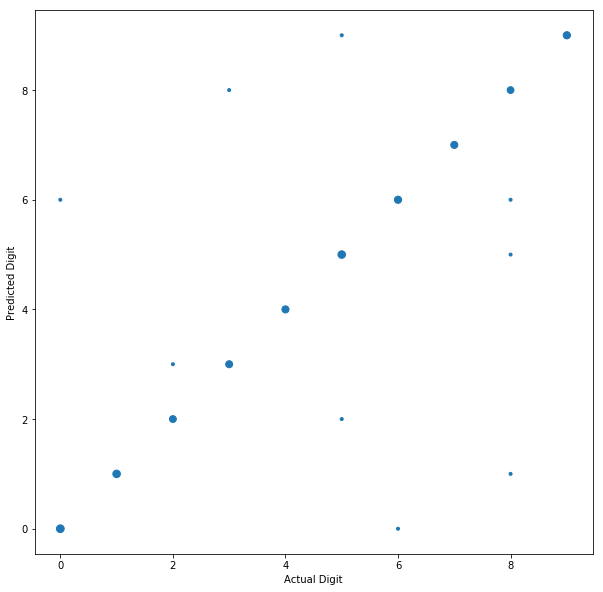

In [65]:
# Visualize the errors
plt.figure(figsize=(10, 10))
plt.scatter(x="actual", y = "predictions", s=grouped_df.cooccurrence + 8, data = grouped_df)
plt.xlabel("Actual Digit")
plt.ylabel("Predicted Digit")
plt.show()

In [61]:
# Compare to Random Forest (just out of curiosity)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(train_features, train_outcome)
clf.score(test_features, test_outcome)

0.94